In [1]:
import pandas as pd  # keywords are highlighted in green, other strings in red, etc.
import numpy as np
from bs4 import BeautifulSoup
import requests



In [2]:
url= "https://www.popvortex.com/music/charts/top-100-songs.php"

In [3]:
# 3. download html with a get request
response = requests.get(url)
response.status_code # 200 status code means OK!

200

In [4]:
# 4.1. parse html (create the 'soup')
soup = BeautifulSoup(response.content, "html.parser")

In [5]:
# 4.2. check that the html code looks like it should
#soup

In [6]:

soup.select("#chart-position-1 > div.chart-content.col-xs-12.col-sm-8 > p")

[<p class="title-artist"><cite class="title">Last Night</cite><em class="artist">Morgan Wallen</em></p>]

In [7]:
soup.select("div.chart-content.col-xs-12.col-sm-8 > p > cite")[0].get_text()

'Last Night'

In [8]:
soup.select("div.chart-content.col-xs-12.col-sm-8 > p > em")[0].get_text()

'Morgan Wallen'

In [9]:
#initialize empty lists
title = []
artist = []

# define the number of iterations of our for loop
# by checking how many elements are in the retrieved result set
# (this is equivalent but more robust than just explicitly defining 250 iterations)
num_iter = len(soup.select("div.chart-content.col-xs-12.col-sm-8 > p > cite"))

tClist = soup.select("div.chart-content.col-xs-12.col-sm-8 > p > cite")
spanlist = soup.select("div.chart-content.col-xs-12.col-sm-8 > p > em")
# iterate through the result set and retrive all the data
for i in range(num_iter):
    title.append(tClist[i].get_text())
    artist.append(spanlist[i].get_text())

print(title)
print(artist)

['Last Night', 'Flowers', 'Fast Car', 'Like Crazy (Deep House Remix)', 'Calm Down', 'Like Crazy (UK Garage Remix)', 'Anti-Hero', 'Like Crazy (Instrumental)', 'Heart Like A Truck', 'You Say', 'Eyes Closed', 'Players', 'Like Crazy (English Version)', 'Like Crazy', 'Thinkin’ Bout Me', 'Thought You Should Know', 'Thank God', 'Thank God I Do', 'Fighting Myself', 'TRUSTFALL', "God's Country", 'Love You Anyway', "Growin' Up and Gettin' Old", 'labour', 'Rock and a Hard Place', '5 Leaf Clover', 'Rescue', 'Wasted On You', 'Favorite Song', 'wait in the truck', 'Unstoppable', "I Ain't Worried", 'Kill Bill', "Sounds Like Something I'd Do", 'VOID', 'NEED A FAVOR', "Life's Incredible Again", 'All Of The Girls You Loved Before', 'Red Ruby Da Sleeze (Sped Up) [feat. Xxtristanxo & Speed Radio]', 'You Proof', "Something in the Orange (Z&E's Version)", 'In Jesus Name (God Of Possible)', 'Tennessee Whiskey', "Chasin' You", 'As It Was', 'Justice for All', 'Sure Thing', 'One Thing At A Time', 'Rainbowland (f

In [10]:
top100songs = pd.DataFrame({"title":title,
                       "artist":artist})

In [11]:
top100songs

,title,artist
0,Last Night,Morgan Wallen
1,Flowers,Miley Cyrus
2,Fast Car,Luke Combs
3,Like Crazy (Deep House Remix),Jimin
4,Calm Down,Rema & Selena Gomez
...,...,...
95,What He Didn't Do,Carly Pearce
96,Snooze,SZA
97,Life’s Incredible Again,Gasteiz Big Band
98,Shivers,Ed Sheeran


In [12]:
top100songs.to_csv('new_data.csv', index=False)

In [13]:
song_title = input ('please insert song name:')


please insert song name:Flowers


In [14]:
song_artist = input('please insert artist:')

please insert artist:Miley Cyrus


In [15]:
import random
x = random.randint(0,100)
# check if the song is in the DataFrame
if song_title in top100songs['title'].values:
    # if the song is in the DataFrame, recommend a different song
    recommended_song = top100songs.loc[top100songs['title'] != song_title, 'title'].iloc[x]
    print("You might like:", recommended_song)
else:
    # if the song is not in the DataFrame, print a message
    print("Sorry, we cannot recommend a song.")
if song_artist in top100songs['artist'].values:
    recommended_artist = top100songs.loc[top100songs['artist'] != song_artist, 'artist'].iloc[x]
    print ('You might like:', recommended_artist)
else: 
    print("Sorry,we cannot recommend an artist.")

You might like: Out of My Head
You might like: BAD OPTIX


# Lab API wrappers - Create your collection of songs & audio features

In [65]:
secrets_file = open("secrets-Copy1.txt","r")

In [66]:
string = secrets_file.read()

In [67]:
string.split('\n')

['',
 '',
 'cid:03cc2e02247b4b9ca1f21cb46e59ce47',
 'csecret:f938e4f2bdb04691a103bbcac8b21710']

In [68]:
secrets_dict={}
for line in string.split('\n'):
    if len(line) > 0:
        secrets_dict[line.split(':')[0]]=line.split(':')[1].strip()

In [69]:
# 5S8SJdl1BDc0ugpkEvFsIL

In [70]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

#Initialize SpotiPy with user credentials
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=secrets_dict['cid'],
                                                           client_secret=secrets_dict['csecret']))

In [73]:
playlist = sp.user_playlist_tracks("spotify", "5S8SJdl1BDc0ugpkEvFsIL")

In [51]:
playlist

{'href': 'https://api.spotify.com/v1/playlists/5S8SJdl1BDc0ugpkEvFsIL/tracks?offset=0&limit=100&additional_types=track',
 'items': [{'added_at': '2017-11-20T02:52:18Z',
   'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/twgeb7mzdcv4u8h191dxrvlpc'},
    'href': 'https://api.spotify.com/v1/users/twgeb7mzdcv4u8h191dxrvlpc',
    'id': 'twgeb7mzdcv4u8h191dxrvlpc',
    'type': 'user',
    'uri': 'spotify:user:twgeb7mzdcv4u8h191dxrvlpc'},
   'is_local': False,
   'primary_color': None,
   'track': {'album': {'album_group': 'single',
     'album_type': 'single',
     'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/06HL4z0CvFAxyc27GXpf02'},
       'href': 'https://api.spotify.com/v1/artists/06HL4z0CvFAxyc27GXpf02',
       'id': '06HL4z0CvFAxyc27GXpf02',
       'name': 'Taylor Swift',
       'type': 'artist',
       'uri': 'spotify:artist:06HL4z0CvFAxyc27GXpf02'}],
     'available_markets': [],
     'external_urls': {'spotify': 'https://open.sp

In [23]:
playlist.keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [24]:
len(playlist["items"])

100

In [ ]:
playlist["total"]

In [50]:
playlist["offset"]

0

In [26]:
playlist["items"][0].keys()

dict_keys(['added_at', 'added_by', 'is_local', 'primary_color', 'track', 'video_thumbnail'])

In [27]:
playlist["items"][0]["track"]

{'album': {'album_group': 'single',
  'album_type': 'single',
  'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/06HL4z0CvFAxyc27GXpf02'},
    'href': 'https://api.spotify.com/v1/artists/06HL4z0CvFAxyc27GXpf02',
    'id': '06HL4z0CvFAxyc27GXpf02',
    'name': 'Taylor Swift',
    'type': 'artist',
    'uri': 'spotify:artist:06HL4z0CvFAxyc27GXpf02'}],
  'available_markets': [],
  'external_urls': {'spotify': 'https://open.spotify.com/album/0HG8fMDhvN2tH5uPHFsyZP'},
  'href': 'https://api.spotify.com/v1/albums/0HG8fMDhvN2tH5uPHFsyZP',
  'id': '0HG8fMDhvN2tH5uPHFsyZP',
  'images': [{'height': 640,
    'url': 'https://i.scdn.co/image/ab67616d0000b2734322e9bd7d57d061d0e19e1f',
    'width': 640},
   {'height': 300,
    'url': 'https://i.scdn.co/image/ab67616d00001e024322e9bd7d57d061d0e19e1f',
    'width': 300},
   {'height': 64,
    'url': 'https://i.scdn.co/image/ab67616d000048514322e9bd7d57d061d0e19e1f',
    'width': 64}],
  'is_playable': True,
  'name': '...Ready

In [28]:
playlist["items"][0]["track"].keys()

dict_keys(['album', 'artists', 'available_markets', 'disc_number', 'duration_ms', 'episode', 'explicit', 'external_ids', 'external_urls', 'href', 'id', 'is_local', 'name', 'popularity', 'preview_url', 'track', 'track_number', 'type', 'uri'])

In [29]:
playlist["items"][0]["track"]['artists'] # gets me a list use index number []

[{'external_urls': {'spotify': 'https://open.spotify.com/artist/06HL4z0CvFAxyc27GXpf02'},
  'href': 'https://api.spotify.com/v1/artists/06HL4z0CvFAxyc27GXpf02',
  'id': '06HL4z0CvFAxyc27GXpf02',
  'name': 'Taylor Swift',
  'type': 'artist',
  'uri': 'spotify:artist:06HL4z0CvFAxyc27GXpf02'}]

In [30]:
playlist["items"][0]["track"]['artists'][0]  # GETS ME A DICTIONARY USE A KEY

{'external_urls': {'spotify': 'https://open.spotify.com/artist/06HL4z0CvFAxyc27GXpf02'},
 'href': 'https://api.spotify.com/v1/artists/06HL4z0CvFAxyc27GXpf02',
 'id': '06HL4z0CvFAxyc27GXpf02',
 'name': 'Taylor Swift',
 'type': 'artist',
 'uri': 'spotify:artist:06HL4z0CvFAxyc27GXpf02'}

In [31]:
playlist["items"][0]["track"]['artists'][0]["name"] # gets me the artist

'Taylor Swift'

In [32]:
playlist["items"][0]["track"]["album"].keys() 

dict_keys(['album_group', 'album_type', 'artists', 'available_markets', 'external_urls', 'href', 'id', 'images', 'is_playable', 'name', 'release_date', 'release_date_precision', 'total_tracks', 'type', 'uri'])

In [33]:
playlist["items"][5]["track"]["album"]["name"] # gets me the song title

'Havana (feat. Young Thug)'

In [34]:
from random import randint
from time import sleep

def get_playlist_tracks(playlist_id):
    results = sp.user_playlist_tracks("spotify",playlist_id)
    tracks = results['items']
    while results['next']!=None:
        results = sp.next(results)
        tracks = tracks + results['items']
        sleep(randint(1,3))
    return tracks

In [35]:
all_tracks = get_playlist_tracks("'2pMAmZdHfQHyqJCXJbfhK3')")
len(all_tracks)

10000

In [37]:
song_uri = all_tracks[0]["track"]['uri']
song_uri

'spotify:track:7zgqtptZvhf8GEmdsM2vp2'

In [39]:
playlist["items"][5]["track"]['artists'][0]["name"]

'Camila Cabello'

In [40]:
Artists= []

for i in range(len(all_tracks)):
    Artists.append(all_tracks[i]["track"]['artists'][0]["name"])

In [41]:
len(Artists)

10000

In [42]:
Song_uri= []

for i in range(len(all_tracks)):
    Song_uri.append(all_tracks[i]["track"]['uri'])

In [43]:
Song_uri

['spotify:track:7zgqtptZvhf8GEmdsM2vp2',
 'spotify:track:4Vxu50qVrQcycjRyJQaZLC',
 'spotify:track:6b8Be6ljOzmkOmFslEb23P',
 'spotify:track:0afhq8XCExXpqazXczTSve',
 'spotify:track:1HNkqx9Ahdgi1Ixy2xkKkL',
 'spotify:track:0ofbQMrRDsUaVKq2mGLEAb',
 'spotify:track:0nJW01T7XtvILxQgC5J7Wh',
 'spotify:track:6C2PfemHQul77DVpnvuAIs',
 'spotify:track:3PGdPUMdUg7a3Tgr5gkfKK',
 'spotify:track:34gCuhDGsG4bRPIf9bb02f',
 'spotify:track:3528IXKpbb7OMjdjWYlbfD',
 'spotify:track:7AEAGTc8cReDqcbPoY9gwo',
 'spotify:track:273dCMFseLcVsoSWx59IoE',
 'spotify:track:1X1DWw2pcNZ8zSub3uhlNz',
 'spotify:track:1LmN9SSHISbtp9LoaR5ZVJ',
 'spotify:track:2iuZJX9X9P0GKaE93xcPjk',
 'spotify:track:0JcKdUGNR7zI4jJDLyYXbi',
 'spotify:track:0KKkJNfGyhkQ5aFogxQAPU',
 'spotify:track:2Bs4jQEGMycglOfWPBqrVG',
 'spotify:track:72Q0FQQo32KJloivv5xge2',
 'spotify:track:59HjlYCeBsxdI0fcm3zglw',
 'spotify:track:5Z3GHaZ6ec9bsiI5BenrbY',
 'spotify:track:1D1nixOVWOxvNfWi0UD7VX',
 'spotify:track:3zSCNTXI7Ed0PiidZVmzIe',
 'spotify:track:

In [44]:
Title= []

for i in range(len(all_tracks)):
    Title.append(all_tracks[i]["track"]["album"]["name"])

In [45]:
Title

['...Ready For It?',
 'Life Changes',
 '24K Magic',
 '÷ (Deluxe)',
 'x (Deluxe Edition)',
 'Havana (feat. Young Thug)',
 'Unorthodox Jukebox',
 'Rocky III: Music From The Motion Picture',
 'Red Pill Blues (Deluxe)',
 'x (Deluxe Edition)',
 'Picture Show (Deluxe Edition)',
 'Red',
 '1989',
 '#3',
 'Overexposed',
 'V',
 'The Incredible Machine',
 '24K Magic',
 'FOUR (Deluxe)',
 "I'm the One",
 '1989',
 'American Teen',
 'Unwritten',
 'The Essential R. Kelly',
 'Full Moon Fever',
 "Blowin' Your Mind!",
 'Future History (Deluxe Edition)',
 'Hey, Soul Sister',
 'Woodstock',
 'Closer',
 'TROLLS (Original Motion Picture Soundtrack)',
 'iSouljaBoyTellem',
 'Uptown Special',
 '1989',
 'Hands All Over',
 'PRISM (Deluxe)',
 'Was nicht passt, wird passend gemacht (Music Inspired By the Film)',
 'Fearless',
 'Hot Fuss',
 'Red',
 'DNCE',
 'Kiss (Deluxe)',
 'Red (Deluxe Edition)',
 'Teenage Dream: The Complete Confection',
 '1989',
 'Taylor Swift',
 'Fearless',
 'Fearless',
 '1989 (Deluxe Edition)',


In [46]:
df= pd.DataFrame({"Artists":Artists,"Title":Title, "Song_uri": Song_uri})

In [47]:
df

,Artists,Title,Song_uri
0,Taylor Swift,...Ready For It?,spotify:track:7zgqtptZvhf8GEmdsM2vp2
1,Thomas Rhett,Life Changes,spotify:track:4Vxu50qVrQcycjRyJQaZLC
2,Bruno Mars,24K Magic,spotify:track:6b8Be6ljOzmkOmFslEb23P
3,Ed Sheeran,÷ (Deluxe),spotify:track:0afhq8XCExXpqazXczTSve
4,Ed Sheeran,x (Deluxe Edition),spotify:track:1HNkqx9Ahdgi1Ixy2xkKkL
...,...,...,...
9995,Elton John,Goodbye Yellow Brick Road (40th Anniversary Ce...,spotify:track:4UFlPCB4THnQ9TlPHqIQow
9996,Supertramp,Even In The Quietest Moments,spotify:track:5pSSEkT0963muzzIjsVkrs
9997,Yes,Fragile (Deluxe Edition),spotify:track:7gC6Rbllqf1yXNC02e5jz2
9998,Paul McCartney,Wings Over America (Remastered),spotify:track:6Ff77WXC58MkhLE5A1qgY1


In [ ]:
df.head

# Add audio features

In [86]:
#sp.audio_features(Song_uri)

In [87]:
def get_features(uri):
    features =[]
    count = 0
    for x in uri:
        count = count+1
        if count %15 == 0:
            sleep(randint(1,2))
        try:
            features.append(sp.audio_features(x)) 
        except:
            features.append(None)
    return features

In [88]:
audio_features= get_features(Song_uri)

In [90]:
len(audio_features)

10000

In [91]:
data= pd.DataFrame({"Artists":Artists,"Title":Title, "Song_uri": Song_uri, "audio_features":audio_features})

In [92]:
def flattendf(data, col_list):
    for column in col_list:
        flattened = pd.DataFrame(dict(data[column])).transpose()
        columns = [str(col) for col in flattened.columns]
        flattened.columns = [column + '_' + colname for colname in columns]
        data = pd.concat([data, flattened], axis=1)
        data = data.drop(column, axis=1)
    return data

In [95]:
data.head()

,Artists,Title,Song_uri,audio_features
0,Taylor Swift,...Ready For It?,spotify:track:7zgqtptZvhf8GEmdsM2vp2,None
1,Thomas Rhett,Life Changes,spotify:track:4Vxu50qVrQcycjRyJQaZLC,"[{'danceability': 0.687, 'energy': 0.845, 'key..."
2,Bruno Mars,24K Magic,spotify:track:6b8Be6ljOzmkOmFslEb23P,"[{'danceability': 0.818, 'energy': 0.803, 'key..."
3,Ed Sheeran,÷ (Deluxe),spotify:track:0afhq8XCExXpqazXczTSve,"[{'danceability': 0.624, 'energy': 0.876, 'key..."
4,Ed Sheeran,x (Deluxe Edition),spotify:track:1HNkqx9Ahdgi1Ixy2xkKkL,"[{'danceability': 0.614, 'energy': 0.379, 'key..."


In [96]:

columns = ['audio_features']
data = flattendf(data, columns)
data.head(5)

,Artists,Title,Song_uri,audio_features_0
0,Taylor Swift,...Ready For It?,spotify:track:7zgqtptZvhf8GEmdsM2vp2,None
1,Thomas Rhett,Life Changes,spotify:track:4Vxu50qVrQcycjRyJQaZLC,"{'danceability': 0.687, 'energy': 0.845, 'key'..."
2,Bruno Mars,24K Magic,spotify:track:6b8Be6ljOzmkOmFslEb23P,"{'danceability': 0.818, 'energy': 0.803, 'key'..."
3,Ed Sheeran,÷ (Deluxe),spotify:track:0afhq8XCExXpqazXczTSve,"{'danceability': 0.624, 'energy': 0.876, 'key'..."
4,Ed Sheeran,x (Deluxe Edition),spotify:track:1HNkqx9Ahdgi1Ixy2xkKkL,"{'danceability': 0.614, 'energy': 0.379, 'key'..."


In [97]:
pd.set_option('display.max_columns', 0)
columns = ['audio_features_0']
all_songs = flattendf(data, columns)
all_songs

,Artists,Title,Song_uri,audio_features_0_danceability,audio_features_0_energy,audio_features_0_key,audio_features_0_loudness,audio_features_0_mode,audio_features_0_speechiness,audio_features_0_acousticness,audio_features_0_instrumentalness,audio_features_0_liveness,audio_features_0_valence,audio_features_0_tempo,audio_features_0_type,audio_features_0_id,audio_features_0_uri,audio_features_0_track_href,audio_features_0_analysis_url,audio_features_0_duration_ms,audio_features_0_time_signature
0,Taylor Swift,...Ready For It?,spotify:track:7zgqtptZvhf8GEmdsM2vp2,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,Thomas Rhett,Life Changes,spotify:track:4Vxu50qVrQcycjRyJQaZLC,0.687,0.845,7,-4.37,1,0.0576,0.1,0,0.0452,0.809,87.972,audio_features,4Vxu50qVrQcycjRyJQaZLC,spotify:track:4Vxu50qVrQcycjRyJQaZLC,https://api.spotify.com/v1/tracks/4Vxu50qVrQcy...,https://api.spotify.com/v1/audio-analysis/4Vxu...,190227,4
2,Bruno Mars,24K Magic,spotify:track:6b8Be6ljOzmkOmFslEb23P,0.818,0.803,1,-4.282,1,0.0797,0.034,0,0.153,0.632,106.97,audio_features,6b8Be6ljOzmkOmFslEb23P,spotify:track:6b8Be6ljOzmkOmFslEb23P,https://api.spotify.com/v1/tracks/6b8Be6ljOzmk...,https://api.spotify.com/v1/audio-analysis/6b8B...,225983,4
3,Ed Sheeran,÷ (Deluxe),spotify:track:0afhq8XCExXpqazXczTSve,0.624,0.876,9,-3.374,1,0.1,0.0735,0,0.327,0.781,99.943,audio_features,0afhq8XCExXpqazXczTSve,spotify:track:0afhq8XCExXpqazXczTSve,https://api.spotify.com/v1/tracks/0afhq8XCExXp...,https://api.spotify.com/v1/audio-analysis/0afh...,170827,4
4,Ed Sheeran,x (Deluxe Edition),spotify:track:1HNkqx9Ahdgi1Ixy2xkKkL,0.614,0.379,4,-10.48,1,0.0476,0.607,0.000464,0.0986,0.201,107.989,audio_features,1HNkqx9Ahdgi1Ixy2xkKkL,spotify:track:1HNkqx9Ahdgi1Ixy2xkKkL,https://api.spotify.com/v1/tracks/1HNkqx9Ahdgi...,https://api.spotify.com/v1/audio-analysis/1HNk...,258987,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Elton John,Goodbye Yellow Brick Road (40th Anniversary Ce...,spotify:track:4UFlPCB4THnQ9TlPHqIQow,0.41,0.761,9,-8.507,0,0.0465,0.0198,0.0847,0.247,0.193,138.712,audio_features,4UFlPCB4THnQ9TlPHqIQow,spotify:track:4UFlPCB4THnQ9TlPHqIQow,https://api.spotify.com/v1/tracks/4UFlPCB4THnQ...,https://api.spotify.com/v1/audio-analysis/4UFl...,666572,4
9996,Supertramp,Even In The Quietest Moments,spotify:track:5pSSEkT0963muzzIjsVkrs,0.406,0.306,3,-10.482,1,0.0372,0.313,0.0079,0.0727,0.073,135.272,audio_features,5pSSEkT0963muzzIjsVkrs,spotify:track:5pSSEkT0963muzzIjsVkrs,https://api.spotify.com/v1/tracks/5pSSEkT0963m...,https://api.spotify.com/v1/audio-analysis/5pSS...,652560,4
9997,Yes,Fragile (Deluxe Edition),spotify:track:7gC6Rbllqf1yXNC02e5jz2,0.362,0.507,1,-11.229,1,0.0394,0.0174,0.216,0.113,0.456,146.641,audio_features,7gC6Rbllqf1yXNC02e5jz2,spotify:track:7gC6Rbllqf1yXNC02e5jz2,https://api.spotify.com/v1/tracks/7gC6Rbllqf1y...,https://api.spotify.com/v1/audio-analysis/7gC6...,634440,3
9998,Paul McCartney,Wings Over America (Remastered),spotify:track:6Ff77WXC58MkhLE5A1qgY1,0.331,0.733,2,-8.671,1,0.0468,0.0887,0.00174,0.947,0.38,128.512,audio_features,6Ff77WXC58MkhLE5A1qgY1,spotify:track:6Ff77WXC58MkhLE5A1qgY1,https://api.spotify.com/v1/tracks/6Ff77WXC58Mk...,https://api.spotify.com/v1/audio-analysis/6Ff7...,620747,4


In [98]:
all_songs.columns = all_songs.columns.str.replace(r"audio_features_0_", "")

In [99]:
all_songs

,Artists,Title,Song_uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,Taylor Swift,...Ready For It?,spotify:track:7zgqtptZvhf8GEmdsM2vp2,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,Thomas Rhett,Life Changes,spotify:track:4Vxu50qVrQcycjRyJQaZLC,0.687,0.845,7,-4.37,1,0.0576,0.1,0,0.0452,0.809,87.972,audio_features,4Vxu50qVrQcycjRyJQaZLC,spotify:track:4Vxu50qVrQcycjRyJQaZLC,https://api.spotify.com/v1/tracks/4Vxu50qVrQcy...,https://api.spotify.com/v1/audio-analysis/4Vxu...,190227,4
2,Bruno Mars,24K Magic,spotify:track:6b8Be6ljOzmkOmFslEb23P,0.818,0.803,1,-4.282,1,0.0797,0.034,0,0.153,0.632,106.97,audio_features,6b8Be6ljOzmkOmFslEb23P,spotify:track:6b8Be6ljOzmkOmFslEb23P,https://api.spotify.com/v1/tracks/6b8Be6ljOzmk...,https://api.spotify.com/v1/audio-analysis/6b8B...,225983,4
3,Ed Sheeran,÷ (Deluxe),spotify:track:0afhq8XCExXpqazXczTSve,0.624,0.876,9,-3.374,1,0.1,0.0735,0,0.327,0.781,99.943,audio_features,0afhq8XCExXpqazXczTSve,spotify:track:0afhq8XCExXpqazXczTSve,https://api.spotify.com/v1/tracks/0afhq8XCExXp...,https://api.spotify.com/v1/audio-analysis/0afh...,170827,4
4,Ed Sheeran,x (Deluxe Edition),spotify:track:1HNkqx9Ahdgi1Ixy2xkKkL,0.614,0.379,4,-10.48,1,0.0476,0.607,0.000464,0.0986,0.201,107.989,audio_features,1HNkqx9Ahdgi1Ixy2xkKkL,spotify:track:1HNkqx9Ahdgi1Ixy2xkKkL,https://api.spotify.com/v1/tracks/1HNkqx9Ahdgi...,https://api.spotify.com/v1/audio-analysis/1HNk...,258987,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Elton John,Goodbye Yellow Brick Road (40th Anniversary Ce...,spotify:track:4UFlPCB4THnQ9TlPHqIQow,0.41,0.761,9,-8.507,0,0.0465,0.0198,0.0847,0.247,0.193,138.712,audio_features,4UFlPCB4THnQ9TlPHqIQow,spotify:track:4UFlPCB4THnQ9TlPHqIQow,https://api.spotify.com/v1/tracks/4UFlPCB4THnQ...,https://api.spotify.com/v1/audio-analysis/4UFl...,666572,4
9996,Supertramp,Even In The Quietest Moments,spotify:track:5pSSEkT0963muzzIjsVkrs,0.406,0.306,3,-10.482,1,0.0372,0.313,0.0079,0.0727,0.073,135.272,audio_features,5pSSEkT0963muzzIjsVkrs,spotify:track:5pSSEkT0963muzzIjsVkrs,https://api.spotify.com/v1/tracks/5pSSEkT0963m...,https://api.spotify.com/v1/audio-analysis/5pSS...,652560,4
9997,Yes,Fragile (Deluxe Edition),spotify:track:7gC6Rbllqf1yXNC02e5jz2,0.362,0.507,1,-11.229,1,0.0394,0.0174,0.216,0.113,0.456,146.641,audio_features,7gC6Rbllqf1yXNC02e5jz2,spotify:track:7gC6Rbllqf1yXNC02e5jz2,https://api.spotify.com/v1/tracks/7gC6Rbllqf1y...,https://api.spotify.com/v1/audio-analysis/7gC6...,634440,3
9998,Paul McCartney,Wings Over America (Remastered),spotify:track:6Ff77WXC58MkhLE5A1qgY1,0.331,0.733,2,-8.671,1,0.0468,0.0887,0.00174,0.947,0.38,128.512,audio_features,6Ff77WXC58MkhLE5A1qgY1,spotify:track:6Ff77WXC58MkhLE5A1qgY1,https://api.spotify.com/v1/tracks/6Ff77WXC58Mk...,https://api.spotify.com/v1/audio-analysis/6Ff7...,620747,4


In [100]:
all_songs.to_csv('spotifytracks10000.csv', index=False)

# Cluster audio_features

In [134]:
tracks_df= pd.read_csv('spotifytracks10000.csv')

In [135]:
tracks_df.columns

Index(['Artists', 'Title', 'Song_uri', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href',
       'analysis_url', 'duration_ms', 'time_signature'],
      dtype='object')

In [138]:
tracks_df.dropna(inplace= True)

In [139]:
features_df= tracks_df.drop(['Artists', 'Title', 'Song_uri','type', 'id', 'uri', 'track_href','analysis_url'],axis=1)
features_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
1,0.687,0.845,7.0,-4.370,1.0,0.0576,0.10000,0.000000,0.0452,0.809,87.972,190227.0,4.0
2,0.818,0.803,1.0,-4.282,1.0,0.0797,0.03400,0.000000,0.1530,0.632,106.970,225983.0,4.0
3,0.624,0.876,9.0,-3.374,1.0,0.1000,0.07350,0.000000,0.3270,0.781,99.943,170827.0,4.0
4,0.614,0.379,4.0,-10.480,1.0,0.0476,0.60700,0.000464,0.0986,0.201,107.989,258987.0,4.0
5,0.768,0.517,7.0,-4.323,0.0,0.0312,0.18600,0.000038,0.1040,0.418,104.992,216897.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.410,0.761,9.0,-8.507,0.0,0.0465,0.01980,0.084700,0.2470,0.193,138.712,666572.0,4.0
9996,0.406,0.306,3.0,-10.482,1.0,0.0372,0.31300,0.007900,0.0727,0.073,135.272,652560.0,4.0
9997,0.362,0.507,1.0,-11.229,1.0,0.0394,0.01740,0.216000,0.1130,0.456,146.641,634440.0,3.0
9998,0.331,0.733,2.0,-8.671,1.0,0.0468,0.08870,0.001740,0.9470,0.380,128.512,620747.0,4.0


In [140]:
# K-means
import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from matplotlib.lines import Line2D
from sklearn.cluster import KMeans



In [141]:
scaler= StandardScaler().fit(features_df)
features_scaled= scaler.transform(features_df) # this will be used later again to scale

# Now, all features will have the same weight.
model_df= pd.DataFrame(features_scaled,columns=features_df.columns)

In [158]:
import pickle 
pickle.dump(scaler, open('scaler.pkl', 'wb'))

In [142]:
model_df.shape

(9958, 13)

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

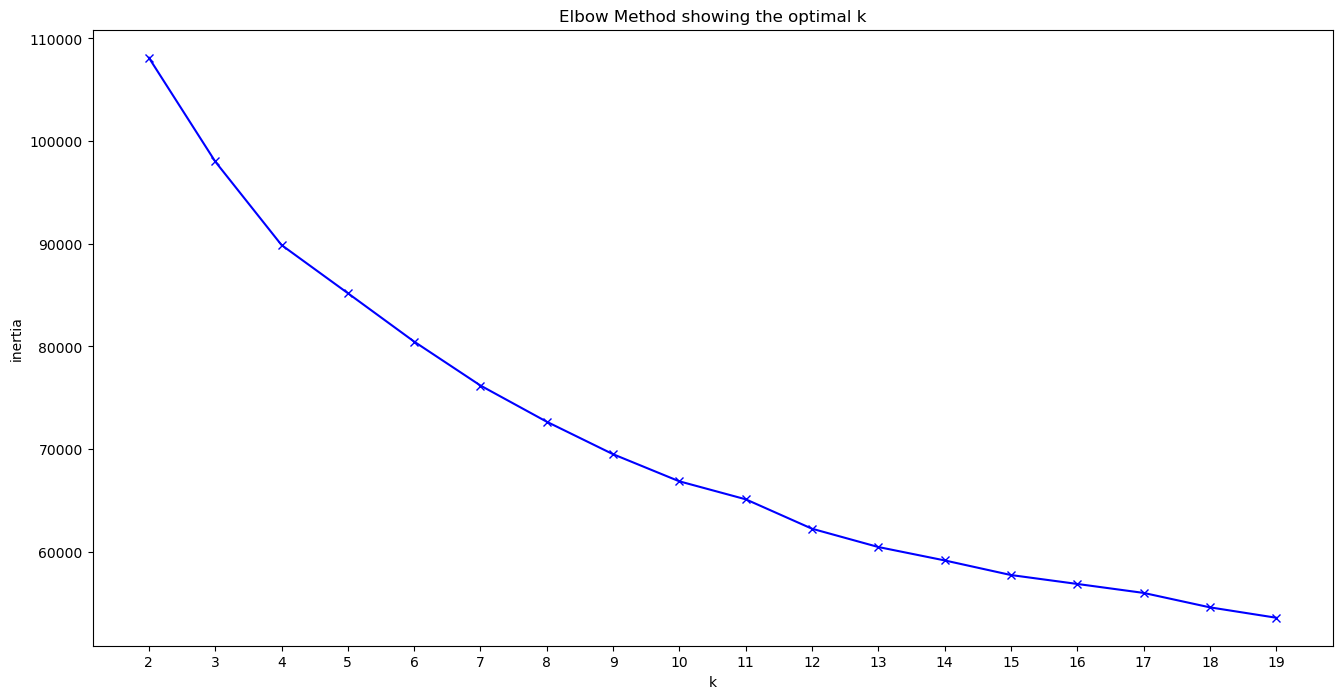

In [143]:
import numpy as np
K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(model_df)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

In [152]:
from sklearn.metrics import silhouette_score
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(model_df)
    silhouette.append(silhouette_score(model_df, kmeans.predict(model_df)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Slhouette score showing the optimal k')

KeyboardInterrupt: 

In [153]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=11, random_state=1234)
kmeans.fit(model_df)

KMeans(n_clusters=11, random_state=1234)

In [159]:
pickle.dump(kmeans, open('kmean.pkl', 'wb'))

In [154]:
# Predicting / assigning the clusters:
clusters = kmeans.predict(model_df)

# Check the size of the clusters
pd.Series(clusters).value_counts().sort_index()

0      350
1     1693
2     1288
3      425
4     1328
5     1078
6      100
7     1269
8      554
9     1489
10     384
dtype: int64

In [155]:
tracks_df.dropna(inplace=True)

In [156]:
tracks_df

,Artists,Title,Song_uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
1,Thomas Rhett,Life Changes,spotify:track:4Vxu50qVrQcycjRyJQaZLC,0.687,0.845,7.0,-4.370,1.0,0.0576,0.10000,0.000000,0.0452,0.809,87.972,audio_features,4Vxu50qVrQcycjRyJQaZLC,spotify:track:4Vxu50qVrQcycjRyJQaZLC,https://api.spotify.com/v1/tracks/4Vxu50qVrQcy...,https://api.spotify.com/v1/audio-analysis/4Vxu...,190227.0,4.0
2,Bruno Mars,24K Magic,spotify:track:6b8Be6ljOzmkOmFslEb23P,0.818,0.803,1.0,-4.282,1.0,0.0797,0.03400,0.000000,0.1530,0.632,106.970,audio_features,6b8Be6ljOzmkOmFslEb23P,spotify:track:6b8Be6ljOzmkOmFslEb23P,https://api.spotify.com/v1/tracks/6b8Be6ljOzmk...,https://api.spotify.com/v1/audio-analysis/6b8B...,225983.0,4.0
3,Ed Sheeran,÷ (Deluxe),spotify:track:0afhq8XCExXpqazXczTSve,0.624,0.876,9.0,-3.374,1.0,0.1000,0.07350,0.000000,0.3270,0.781,99.943,audio_features,0afhq8XCExXpqazXczTSve,spotify:track:0afhq8XCExXpqazXczTSve,https://api.spotify.com/v1/tracks/0afhq8XCExXp...,https://api.spotify.com/v1/audio-analysis/0afh...,170827.0,4.0
4,Ed Sheeran,x (Deluxe Edition),spotify:track:1HNkqx9Ahdgi1Ixy2xkKkL,0.614,0.379,4.0,-10.480,1.0,0.0476,0.60700,0.000464,0.0986,0.201,107.989,audio_features,1HNkqx9Ahdgi1Ixy2xkKkL,spotify:track:1HNkqx9Ahdgi1Ixy2xkKkL,https://api.spotify.com/v1/tracks/1HNkqx9Ahdgi...,https://api.spotify.com/v1/audio-analysis/1HNk...,258987.0,4.0
5,Camila Cabello,Havana (feat. Young Thug),spotify:track:0ofbQMrRDsUaVKq2mGLEAb,0.768,0.517,7.0,-4.323,0.0,0.0312,0.18600,0.000038,0.1040,0.418,104.992,audio_features,0ofbQMrRDsUaVKq2mGLEAb,spotify:track:0ofbQMrRDsUaVKq2mGLEAb,https://api.spotify.com/v1/tracks/0ofbQMrRDsUa...,https://api.spotify.com/v1/audio-analysis/0ofb...,216897.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Elton John,Goodbye Yellow Brick Road (40th Anniversary Ce...,spotify:track:4UFlPCB4THnQ9TlPHqIQow,0.410,0.761,9.0,-8.507,0.0,0.0465,0.01980,0.084700,0.2470,0.193,138.712,audio_features,4UFlPCB4THnQ9TlPHqIQow,spotify:track:4UFlPCB4THnQ9TlPHqIQow,https://api.spotify.com/v1/tracks/4UFlPCB4THnQ...,https://api.spotify.com/v1/audio-analysis/4UFl...,666572.0,4.0
9996,Supertramp,Even In The Quietest Moments,spotify:track:5pSSEkT0963muzzIjsVkrs,0.406,0.306,3.0,-10.482,1.0,0.0372,0.31300,0.007900,0.0727,0.073,135.272,audio_features,5pSSEkT0963muzzIjsVkrs,spotify:track:5pSSEkT0963muzzIjsVkrs,https://api.spotify.com/v1/tracks/5pSSEkT0963m...,https://api.spotify.com/v1/audio-analysis/5pSS...,652560.0,4.0
9997,Yes,Fragile (Deluxe Edition),spotify:track:7gC6Rbllqf1yXNC02e5jz2,0.362,0.507,1.0,-11.229,1.0,0.0394,0.01740,0.216000,0.1130,0.456,146.641,audio_features,7gC6Rbllqf1yXNC02e5jz2,spotify:track:7gC6Rbllqf1yXNC02e5jz2,https://api.spotify.com/v1/tracks/7gC6Rbllqf1y...,https://api.spotify.com/v1/audio-analysis/7gC6...,634440.0,3.0
9998,Paul McCartney,Wings Over America (Remastered),spotify:track:6Ff77WXC58MkhLE5A1qgY1,0.331,0.733,2.0,-8.671,1.0,0.0468,0.08870,0.001740,0.9470,0.380,128.512,audio_features,6Ff77WXC58MkhLE5A1qgY1,spotify:track:6Ff77WXC58MkhLE5A1qgY1,https://api.spotify.com/v1/tracks/6Ff77WXC58Mk...,https://api.spotify.com/v1/audio-analysis/6Ff7...,620747.0,4.0


In [149]:
recommend_df=tracks_df[["Artists","Title"]]
recommend_df

,Artists,Title
1,Thomas Rhett,Life Changes
2,Bruno Mars,24K Magic
3,Ed Sheeran,÷ (Deluxe)
4,Ed Sheeran,x (Deluxe Edition)
5,Camila Cabello,Havana (feat. Young Thug)
...,...,...
9995,Elton John,Goodbye Yellow Brick Road (40th Anniversary Ce...
9996,Supertramp,Even In The Quietest Moments
9997,Yes,Fragile (Deluxe Edition)
9998,Paul McCartney,Wings Over America (Remastered)


In [150]:
recommend_df["Clusters"]=clusters
recommend_df

/var/folders/0v/17715kfs38508b6c7dzmsg8h0000gn/T/ipykernel_14674/1074427187.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recommend_df["Clusters"]=clusters


,Artists,Title,Clusters
1,Thomas Rhett,Life Changes,1
2,Bruno Mars,24K Magic,9
3,Ed Sheeran,÷ (Deluxe),1
4,Ed Sheeran,x (Deluxe Edition),2
5,Camila Cabello,Havana (feat. Young Thug),4
...,...,...,...
9995,Elton John,Goodbye Yellow Brick Road (40th Anniversary Ce...,5
9996,Supertramp,Even In The Quietest Moments,2
9997,Yes,Fragile (Deluxe Edition),10
9998,Paul McCartney,Wings Over America (Remastered),7


In [160]:
recommend_df.to_csv("recommend_df.csv", index=False) # clusters with songs